In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

In [3]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state=42)

In [5]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

<function matplotlib.pyplot.show(close=None, block=None)>

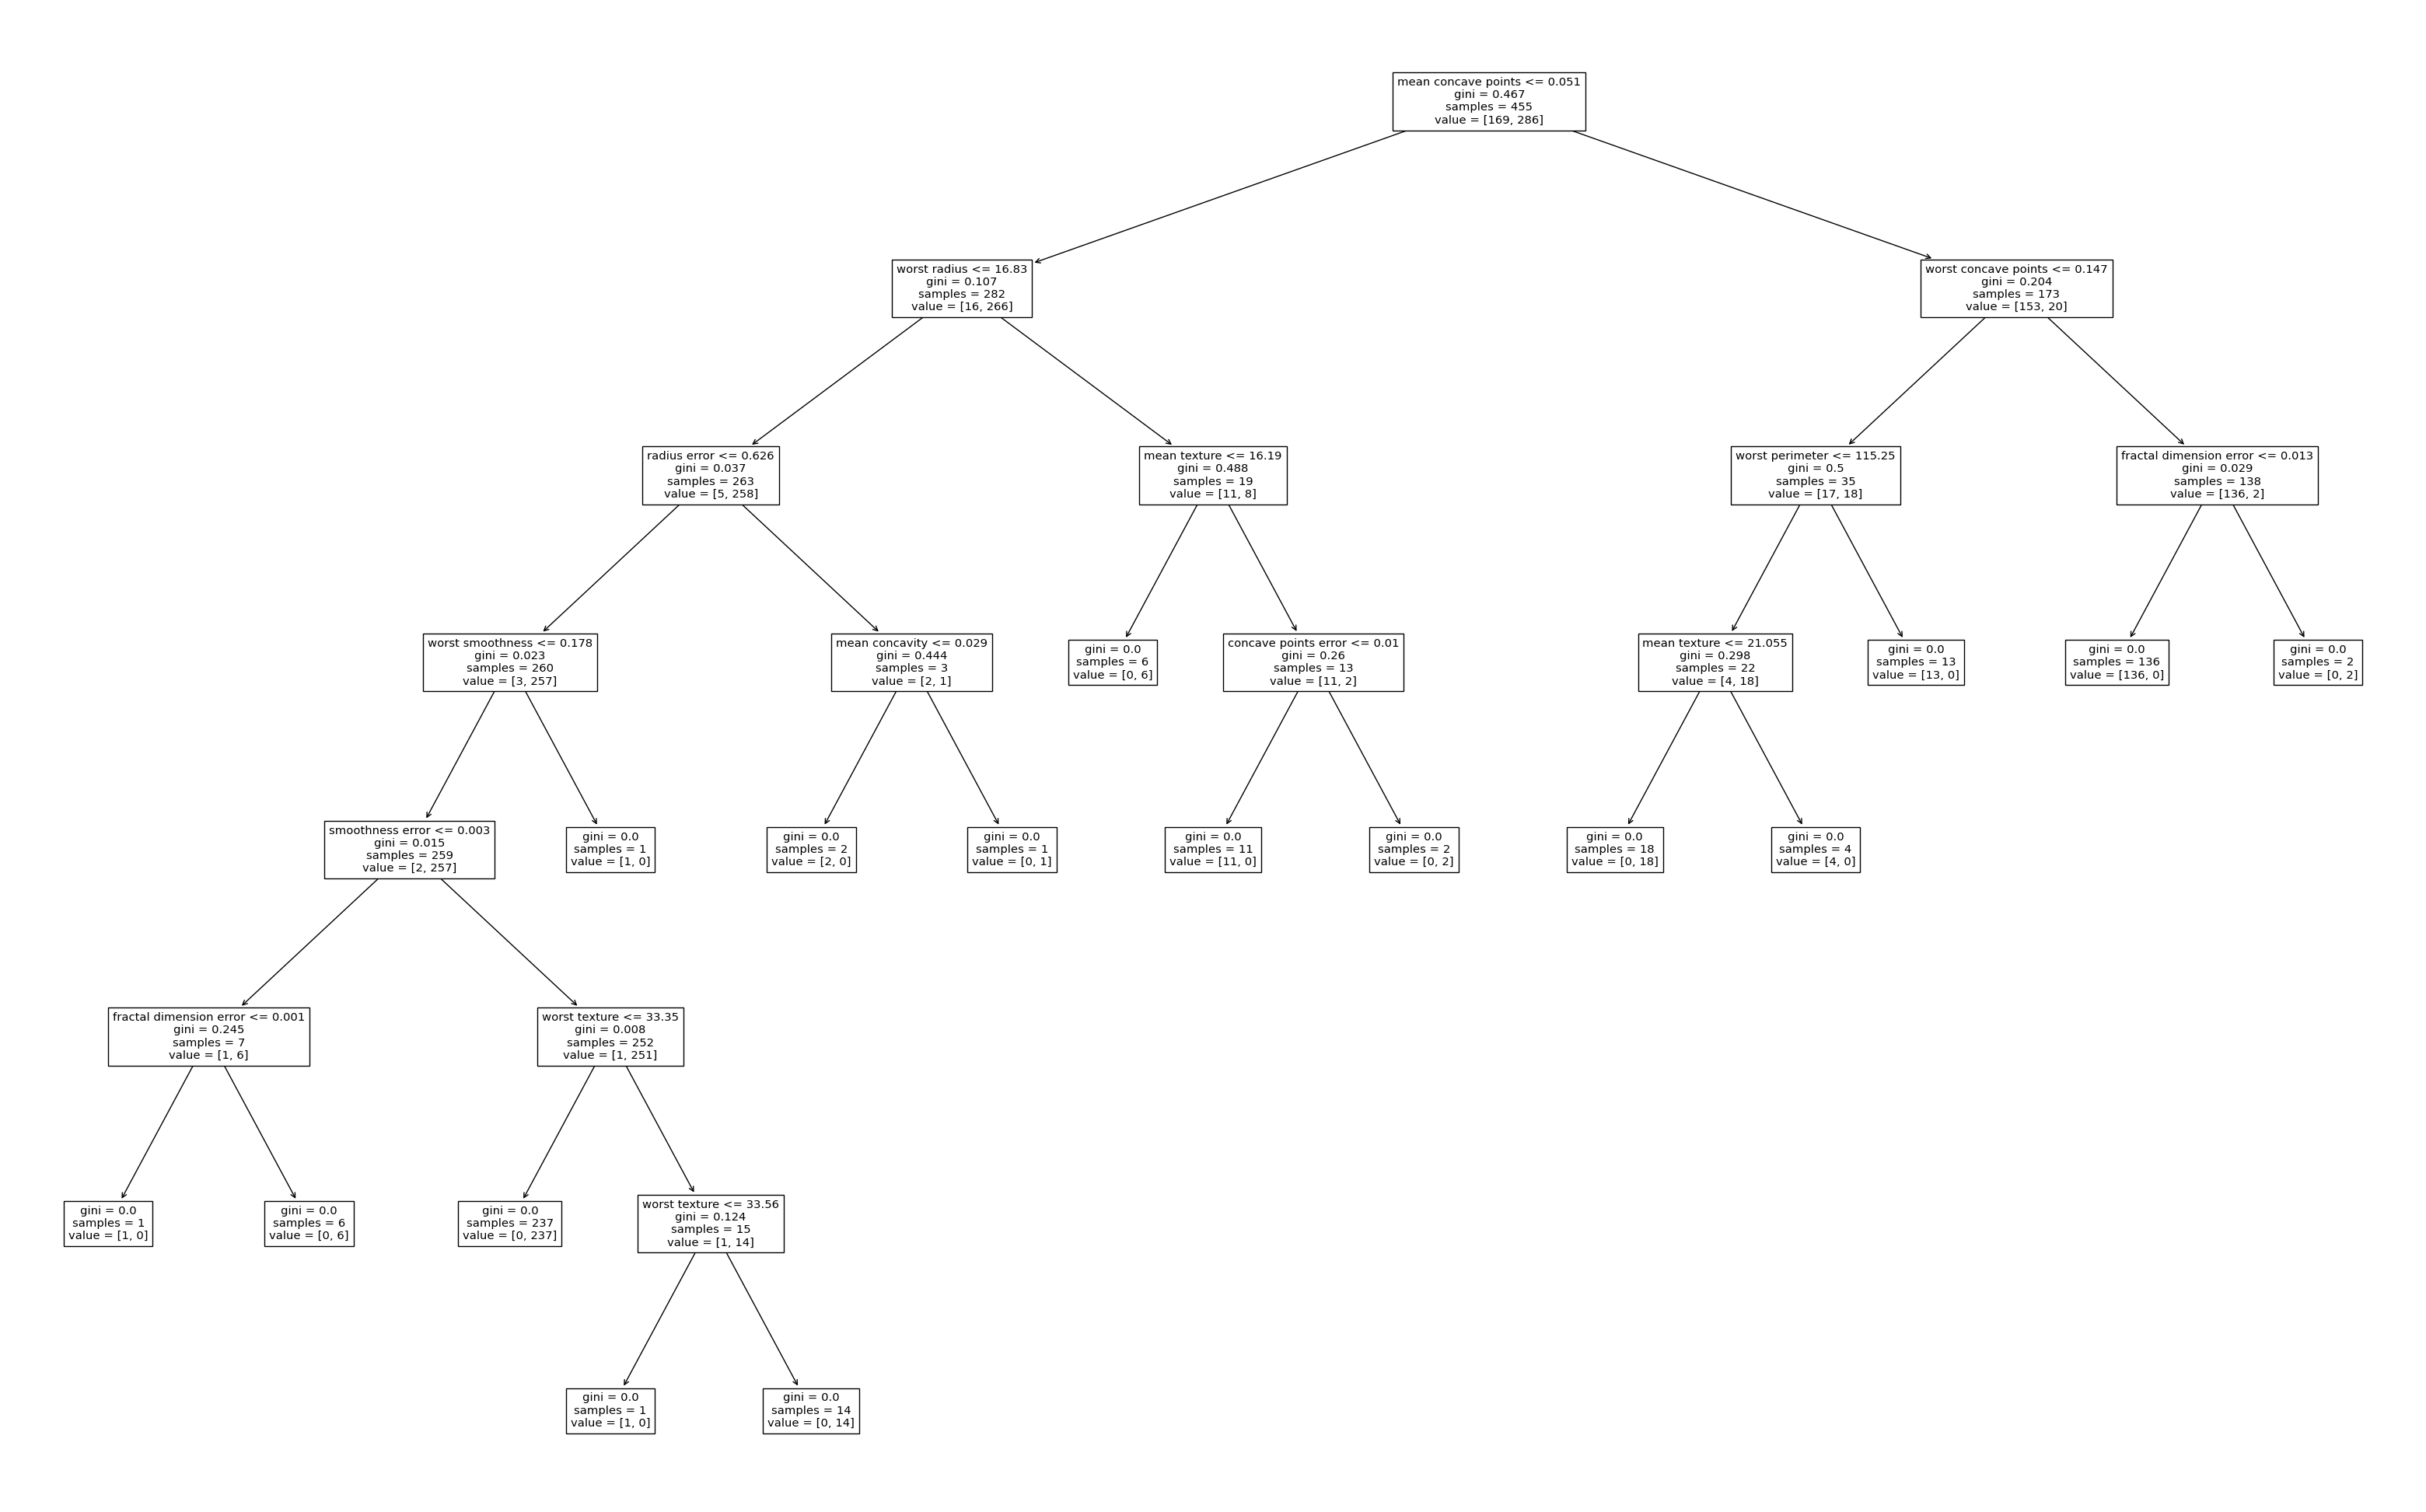

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(40,25))
plot_tree(tree, feature_names=cancer.feature_names)
plt.show

In [7]:
tree.get_depth()

7

In [11]:
y_pred=tree.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9385964912280702

In [12]:
y_pred[:5]

array([1, 0, 0, 1, 1])

In [14]:
X_test[:5]

array([[1.247e+01, 1.860e+01, 8.109e+01, 4.819e+02, 9.965e-02, 1.058e-01,
        8.005e-02, 3.821e-02, 1.925e-01, 6.373e-02, 3.961e-01, 1.044e+00,
        2.497e+00, 3.029e+01, 6.953e-03, 1.911e-02, 2.701e-02, 1.037e-02,
        1.782e-02, 3.586e-03, 1.497e+01, 2.464e+01, 9.605e+01, 6.779e+02,
        1.426e-01, 2.378e-01, 2.671e-01, 1.015e-01, 3.014e-01, 8.750e-02],
       [1.894e+01, 2.131e+01, 1.236e+02, 1.130e+03, 9.009e-02, 1.029e-01,
        1.080e-01, 7.951e-02, 1.582e-01, 5.461e-02, 7.888e-01, 7.975e-01,
        5.486e+00, 9.605e+01, 4.444e-03, 1.652e-02, 2.269e-02, 1.370e-02,
        1.386e-02, 1.698e-03, 2.486e+01, 2.658e+01, 1.659e+02, 1.866e+03,
        1.193e-01, 2.336e-01, 2.687e-01, 1.789e-01, 2.551e-01, 6.589e-02],
       [1.546e+01, 1.948e+01, 1.017e+02, 7.489e+02, 1.092e-01, 1.223e-01,
        1.466e-01, 8.087e-02, 1.931e-01, 5.796e-02, 4.743e-01, 7.859e-01,
        3.094e+00, 4.831e+01, 6.240e-03, 1.484e-02, 2.813e-02, 1.093e-02,
        1.397e-02, 2.461e-03, 1.926e

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
params = {'criterion':["gini", "entropy", "log_loss"],
          "max_depth": range(2,15),
          "splitter": ["best", "random"]
          }

In [17]:
dt = DecisionTreeClassifier()

In [18]:
grid = GridSearchCV(estimator=dt,
                    param_grid=params,
                    scoring='accuracy')

In [19]:
grid.fit(X_train,y_train)

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
130 fits failed out of a total of 390.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
130 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 15),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [20]:
from sklearn import metrics
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [21]:
grid.best_score_

0.9494505494505494

In [22]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 11, 'splitter': 'random'}

In [23]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=11, splitter='random')

In [24]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
randomcv = RandomizedSearchCV(estimator=dt,
                              param_distributions=params,
                              n_iter=20)

In [26]:
randomcv.fit(X_train,y_train)
randomcv.best_score_

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_m

0.9494505494505494

In [27]:
randomcv.best_params_

{'splitter': 'random', 'max_depth': 13, 'criterion': 'entropy'}

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [29]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9649122807017544

In [31]:
rf = RandomForestClassifier(n_estimators=500)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9649122807017544

In [32]:
rf.feature_importances_

array([0.03027284, 0.01756898, 0.05175791, 0.03445775, 0.00611279,
       0.01385354, 0.03905411, 0.12187786, 0.00387707, 0.00412382,
       0.01409795, 0.00460185, 0.00794733, 0.03964975, 0.00455453,
       0.00552236, 0.00800364, 0.00474235, 0.00445432, 0.00701253,
       0.1092584 , 0.01806992, 0.08905256, 0.12422774, 0.01226032,
       0.01821989, 0.04340078, 0.14007737, 0.01515268, 0.00673706])

In [33]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [34]:
df = pd.DataFrame()
df['Columns']  =cancer.feature_names
df['importance'] = rf.feature_importances_
df

,Columns,importance
0,mean radius,0.030273
1,mean texture,0.017569
2,mean perimeter,0.051758
3,mean area,0.034458
4,mean smoothness,0.006113
5,mean compactness,0.013854
6,mean concavity,0.039054
7,mean concave points,0.121878
8,mean symmetry,0.003877
9,mean fractal dimension,0.004124


In [35]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [36]:
df = pd.DataFrame()
df['Columns']  =cancer.feature_names
df['importance'] = rf.feature_importances_

df.sort_values('importance',ascending=False)

,Columns,importance
27,worst concave points,0.140077
23,worst area,0.124228
7,mean concave points,0.121878
20,worst radius,0.109258
22,worst perimeter,0.089053
2,mean perimeter,0.051758
26,worst concavity,0.043401
13,area error,0.039650
6,mean concavity,0.039054
3,mean area,0.034458
